# **Introduction Kelompok 4**
---
---
1. Ananda Ageng Afrizal-Universitas Islam Sultan Agung-Teknik Informatika-Batch6
2. Andhika fathur rahman- universitas sangga buana bandung - teknik informatika - batch6
3. Annisa Fitria Nurdina - Universitas Negeri Semarang - Ilmu Komputer - Batch 6
4. Alfina Richi-Universitas Negeri Medan -Ilmu Komputer - Batch 6
5. Annida Erly Rofiah-Universitas Brawijaya-Fisika Komputasi-Batch 6
6. Alif Naufal Teguh Putra-Universitas Muhammadiyah Jakarta-Teknik Informatika-Batch 6

# **Background**
---
---
1.   Twitch
---
Twitch adalah salah satu platform streaming video langsung terbesar di dunia, dengan fokus utama pada video game, esports, dan konten kreatif. Platform ini memungkinkan para pengguna untuk menonton dan berinteraksi dengan streamer favorit mereka secara real-time. Dengan jutaan pengguna aktif setiap hari, Twitch menerima banyak ulasan dan komentar yang mencerminkan pengalaman dan sentimen pengguna terhadap platform tersebut.
2.   Sentiment Analysis
---
Analisis sentimen adalah alat yang sangat berharga dalam konteks ini karena memungkinkan Twitch untuk memahami perasaan dan pendapat pengguna mereka secara lebih mendalam. Dengan memahami sentimen di balik ulasan dan komentar, Twitch dapat mengidentifikasi area yang memerlukan perbaikan, merespons dengan cepat terhadap keluhan pengguna, dan meningkatkan kepuasan pengguna secara keseluruhan.

# **Problem Statement**
---
---
Twitch ingin memahami sentimen pengguna mereka yang tercermin dalam ulasan yang mereka terima di platform. Saat ini, ulasan-ulasan tersebut belum dianalisis secara sistematis untuk memahami sentimen di baliknya. Tanpa pemahaman yang jelas tentang sentimen pengguna, Twitch mungkin kesulitan dalam mengidentifikasi masalah dan kekuatan layanan mereka serta dalam mengembangkan strategi untuk perbaikan yang efektif. Oleh karena itu, diperlukan sebuah model analisis sentimen yang dapat mengkategorikan ulasan-ulasan ini ke dalam tiga kelas utama: positif, netral, dan negatif.

# **Tujuan**
---
---
1.   **Mengembangkan Model Klasifikasi Sentimen**: Membangun model pembelajaran mesin yang dapat mengkategorikan ulasan pengguna ke dalam tiga kelas sentimen utama: positif, netral, dan negatif.
2.   **Meningkatkan Pemahaman Sentimen Pengguna**: Memberikan wawasan yang lebih dalam tentang perasaan dan pendapat pengguna terhadap platform Twitch.
3. **Mendukung Pengambilan Keputusan**: Membantu tim pengembangan dan manajemen Twitch atau aplikasi live streaming lain dalam mengambil keputusan berbasis data untuk meningkatkan pengalaman pengguna dan kualitas layanan.



# **Target Pencapaian**
---
---
1. **Akurasi Model** : Mencapai akurasi minimal 80% dalam mengklasifikasikan ulasan pengguna.
2. **Evaluasi Model** : Menggunakan metrik evaluasi seperti precision, recall, dan F1-score selain akurasi untuk memastikan bahwa model tidak hanya akurat tetapi juga seimbang dalam mengklasifikasikan semua kelas sentimen.
3. **Implementasi** : Mengimplementasikan model ke dalam **IBM Cloud** untuk analisis sentimen real-time dan pelaporan yang lebih efektif.

In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import resample
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, TextVectorization
from keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.utils import plot_model
import joblib

# **Data loading and Cleaning**

## **Loading**
Memuat dataset ulasan dari file CSV dan menampilkan beberapa informasi dasar tentang dataset tersebut.

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive/')

In [ ]:
df = pd.read_csv('twitch_reviews.csv')

In [ ]:
df.head(5)

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,9221730f-b6e3-4e12-ba45-1ea136e4ff19,keonna,id love to be able to give zero stars and stil...,1,0,19.6.1,2024-05-28 22:30:13,19.6.1
1,19835b29-3ed3-44b2-bf30-e55fad3f3bed,Tyler Richards,Didn't let me open the app,1,0,19.6.1,2024-05-28 22:26:02,19.6.1
2,b8b6517c-a89e-4555-9ad3-1f475de289c3,Yelling Hayfire,"Constantly stuttering during live streams, ver...",1,0,19.6.1,2024-05-28 22:15:17,19.6.1
3,3484d88d-e387-46f3-801a-3a1394e01ab5,Gameon YT,Best live streaming app ever.,5,0,19.6.1,2024-05-28 21:49:36,19.6.1
4,b63eca23-62e3-464e-990a-3148f30d0a91,SLaYeR Gaming,Everything Is Good Appart From The Fact That W...,3,0,19.6.1,2024-05-28 21:47:35,19.6.1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93519 entries, 0 to 93518
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              93519 non-null  object
 1   userName              93518 non-null  object
 2   content               93519 non-null  object
 3   score                 93519 non-null  int64 
 4   thumbsUpCount         93519 non-null  int64 
 5   reviewCreatedVersion  78710 non-null  object
 6   at                    93519 non-null  object
 7   appVersion            78710 non-null  object
dtypes: int64(2), object(6)
memory usage: 5.7+ MB


In [ ]:
df.describe()

,score,thumbsUpCount
count,93519.000000,93519.000000
mean,3.884580,2.299565
std,1.602985,23.323152
min,1.000000,0.000000
25%,3.000000,0.000000
50%,5.000000,0.000000
75%,5.000000,0.000000
max,5.000000,1638.000000


In [ ]:
df.shape

(93519, 8)

**Insight**

1. Dataset Summary
---
Dataset ini berisi informasi tentang ulasan yang diberikan oleh pengguna Twitch di Google Play Store. Selain ulasan, dataset ini juga mencakup informasi tentang peringkat dan tanggal ulasan serta jumlah suka pada setiap ulasan. Terdapat total 28.512 ulasan yang diberikan untuk aplikasi Twitch.
2. Deskripsi Kolom
---
* reviewId: mewakili ID ulasan unik yang sesuai dengan setiap ulasan  
* userName: memberikan informasi tentang nama pengguna yang memberikan * ulasan. Terdapat total ---- nama pengguna unik yang memberikan ulasan  
* content: merupakan ulasan yang diberikan oleh pengguna  
* score: nilai peringkat yang diberikan bersama ulasan yang menunjukkan * tingkat kepuasan. Terdapat 5 kategori  
* thumbsUpCount: jumlah suka yang diterima oleh ulasan tertentu dari pengguna lain  
* reviewCreatedVersion: versi ulasan yang diberikan oleh pengguna  
* at: tanggal & waktu pembuatan ulasan  
appVersion: versi aplikasi yang diulas

## **Cleaning**

In [ ]:
#Menghapus Kolom yang tidak dibutuhkan
df.drop(['reviewId', 'userName', 'thumbsUpCount', 'reviewCreatedVersion', 'at', 'appVersion'],axis=1,inplace=True)

In [ ]:
df.sample(5)

,content,score
87941,Totally cool!!! 😁😁😁😎😎😎,5
8377,"easy to use, works well for streams. if you ar...",4
91718,Dejen de poner tanta publicidad en los streami...,1
68730,Awesome love watching dream smp,5
86915,Is not gay,5


In [ ]:
# Menampilkan hanya baris duplikat
baris_duplikat = df[df.duplicated()]
print("\nBaris yang duplikat:")
print(baris_duplikat)


Baris yang duplikat:
                       content  score
42                        Good      5
59                        Good      5
62                       W app      5
91     Best streaming app ever      5
104                  Great app      5
...                        ...    ...
93513                 Loved it      5
93514                Excellent      5
93515                  Love it      5
93516                  Perfect      5
93518                     Nice      5

[10545 rows x 2 columns]


Terdapat banyak duplikasi data, karena memang dari pihak twitch menyediakan template untuk memberi review, maka dari itu kita tidak melakukan penghapusan duplikasi data

In [ ]:
df.shape

(93519, 2)

In [ ]:
#Memeriksa missing value
missing_values = df.isnull()
print("\nMissing values (True berarti nilai hilang):")
print(missing_values)


Missing values (True berarti nilai hilang):
       content  score
0        False  False
1        False  False
2        False  False
3        False  False
4        False  False
...        ...    ...
93514    False  False
93515    False  False
93516    False  False
93517    False  False
93518    False  False

[93519 rows x 2 columns]


In [ ]:
# Menghitung jumlah nilai yang hilang per kolom
missing_values_count = df.isnull().sum()
print("\nJumlah nilai yang hilang per kolom:")
print(missing_values_count)


Jumlah nilai yang hilang per kolom:
content    0
score      0
dtype: int64


# EDA

In [ ]:
df.sample(5)

,content,score
50226,Great app to watch streams,4
56005,I like the new dark mode theme,5
46686,great way to keep track of your stream,5
20414,"Everything is fine , but can you make full scr...",4
51556,It reminds me to breathe. Thank you ☺️,5


<ipython-input-15-b48a7af62881>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='viridis')


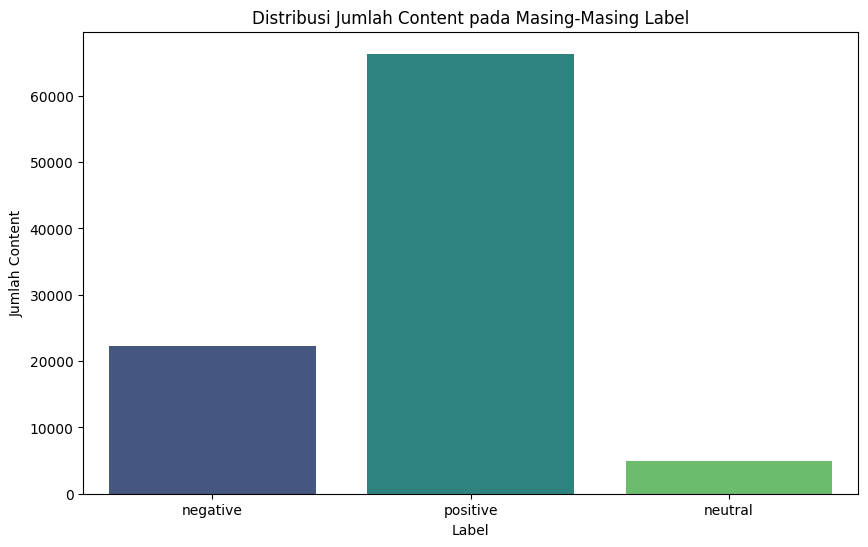

In [ ]:
# Mengubah skor menjadi label
df['label'] = df['score'].apply(lambda x: 'negative' if x in [1, 2] else 'neutral' if x == 3 else 'positive')

# Plotting jumlah content pada masing-masing label
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=df, palette='viridis')
plt.xlabel('Label')
plt.ylabel('Jumlah Content')
plt.title('Distribusi Jumlah Content pada Masing-Masing Label')
plt.show()

**Insight**


*   Dari statistik bar plot diatas  menunjukkan ketidakseimbangan yang signifikan dengan jumlah ulasan positive yang jauh lebih banyak dibandingkan dengan ulasan negative dan neutral




# **Preprocessing dan FE**
(Tokenization, Membersihkan kata yang tidak penting (stopwords), simbol yg tidak penting, melakukan transformasi text, stemming, lemmatization, dll)

In [ ]:
# Add a column for sentiment
df['sentiment'] = df['score'].apply(lambda x: 1 if x > 3 else (0 if x == 3 else -1))

In [ ]:
df.sample(5)

,content,score,label,sentiment
1306,"If the app had a few more QoL changes, it'd be...",4,positive,1
82028,do i need to explain,5,positive,1
62000,Please fix the HORRIBLE LAGG,2,negative,-1
72843,Best app ever,5,positive,1
78114,Feels like a VIP,5,positive,1


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Common words in each class
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [ ]:
#Menghapus emoji
def remove_emoji(text):
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F680-\U0001F6FF"  # transport & map symbols
        "\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "\U00002702-\U000027B0"  # other miscellaneous symbols
        "\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE
    )
    return emoji_pattern.sub(r'', text)


In [ ]:
#Pra-Proses text
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = remove_emoji(text)  # Remove emojis
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\W+', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return tokens


In [ ]:
df['tokens'] = df['content'].apply(lambda x: preprocess_text(x))
df.sample(5)

,content,score,label,sentiment,tokens
29588,Fun to watch and easy to start streaming yourself,5,positive,1,"[fun, watch, easy, start, streaming]"
84266,Dream and George!,5,positive,1,"[dream, george]"
47197,TERRIBLE IM SO SCARED. I WAS ON TWITCH AND I F...,1,negative,-1,"[terrible, im, scared, twitch, found, stream, ..."
30878,Perfect for watching streams in the go.,5,positive,1,"[perfect, watching, stream, go]"
42563,Good streaming platform,5,positive,1,"[good, streaming, platform]"


In [ ]:
#df['token'] = df['content'].apply(preprocess_text)
#df.sample(5)

In [ ]:
# Combine all tokens for each sentiment
positive_words = ' '.join([' '.join(tokens) for tokens in df[df['sentiment'] == 1]['tokens']])
neutral_words = ' '.join([' '.join(tokens) for tokens in df[df['sentiment'] == 0]['tokens']])
negative_words = ' '.join([' '.join(tokens) for tokens in df[df['sentiment'] == -1]['tokens']])

In [ ]:
df.sample(5)

,content,score,label,sentiment,tokens
82777,Yes just y e s,5,positive,1,"[yes, e]"
33197,Lots of ads. Could be more unentrusive imo.,3,neutral,0,"[lot, ad, could, unentrusive, imo]"
44311,WOW THANKS THIS FAVKING APP IS AMAZING YOU THI...,1,negative,-1,"[wow, thanks, favking, app, amazing, think, fa..."
81081,hate this retarded app like I hate ur momma,1,negative,-1,"[hate, retarded, app, like, hate, ur, momma]"
53988,Awesome app. Really love it.,5,positive,1,"[awesome, app, really, love]"


In [ ]:
# Total sentences and words in text
df['num_words'] = df['content'].apply(lambda x: len(x.split()))
df['num_sentences'] = df['content'].apply(lambda x: len(re.split(r'[.!?]+', x)) - 1)

In [ ]:
df.sample(5)

,content,score,label,sentiment,tokens,num_words,num_sentences
27124,It could be made better and efficient and also...,5,positive,1,"[could, made, better, efficient, also, use, ea...",18,0
20567,The streaming aspect is cool but changing your...,3,neutral,0,"[streaming, aspect, cool, changing, username, ...",25,0
15645,Well i like watching live streams but most of ...,4,positive,1,"[well, like, watching, live, stream, horrible,...",27,0
61875,great stuff on here,4,positive,1,"[great, stuff]",4,0
19492,This app takes a lot of time to make account i...,2,negative,-1,"[app, take, lot, time, make, account, always, ...",23,2


In [ ]:
# Count the number of occurrences of each label
label_counts = df['label'].value_counts()

print(label_counts)

label
positive    66351
negative    22306
neutral      4862
Name: count, dtype: int64


Insight
setelah melakukan EDA diatas kita bisa menyimpulkan bahwa terdapat imbalace data, maka dari itu perlu dilakukan penanganan agar datanya seimbang

## Handling Imbalanced Data

In [ ]:
# Handling Imbalanced Data
# Separate majority and minority classes
positive = df[df['sentiment'] == 1]
neutral = df[df['sentiment'] == 0]
negative = df[df['sentiment'] == -1]

In [ ]:
# Resample minority classes
positive_upsampled = resample(positive, replace=True, n_samples=len(negative), random_state=42)
neutral_upsampled = resample(neutral, replace=True, n_samples=len(negative), random_state=42)

In [ ]:
# Combine majority class with upsampled minority classes
data_balanced = pd.concat([negative, positive_upsampled, neutral_upsampled])

In [ ]:
# Count the number of occurrences of each label
label_counts = df['label'].value_counts()

print(label_counts)

label
positive    66351
negative    22306
neutral      4862
Name: count, dtype: int64


## Tokenisasi

In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data_balanced['content'])
X = tokenizer.texts_to_sequences(data_balanced['content'])
X = pad_sequences(X, maxlen=100)
y = pd.get_dummies(data_balanced['sentiment']).values

In [ ]:
x = np.array(X)
x.shape

(66918, 100)

# **Model**

##Split Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (53534, 100)
Test Size  :  (13384, 100)


## Model Definition & Training

In [ ]:
# Modeling (LSTM, Bi-LSTM)
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
model.add(Bidirectional(LSTM(units=64, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(units=64)))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train Model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/20
753/753 [==============================] - 46s 50ms/step - loss: 0.6748 - accuracy: 0.7021 - val_loss: 0.6232 - val_accuracy: 0.7437
Epoch 2/20
753/753 [==============================] - 18s 24ms/step - loss: 0.5255 - accuracy: 0.7914 - val_loss: 0.5468 - val_accuracy: 0.7839
Epoch 3/20
753/753 [==============================] - 16s 21ms/step - loss: 0.4431 - accuracy: 0.8302 - val_loss: 0.5031 - val_accuracy: 0.8016
Epoch 4/20
753/753 [==============================] - 15s 20ms/step - loss: 0.3816 - accuracy: 0.8596 - val_loss: 0.4810 - val_accuracy: 0.8168
Epoch 5/20
753/753 [==============================] - 15s 20ms/step - loss: 0.3315 - accuracy: 0.8799 - val_loss: 0.4853 - val_accuracy: 0.8248
Epoch 6/20
753/753 [==============================] - 17s 22ms/step - loss: 0.2940 - accuracy: 0.8952 - val_loss: 0.4694 - val_accuracy: 0.8409
Epoch 7/20
753/753 [==============================] - 16s 21ms/step - loss: 0.2599 - accuracy: 0.9080 - val_loss: 0.4832 - val_accuracy:

Menyimpan file model

In [ ]:
#Menyimpan file dengan format h5
model.save("twitchscore.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#Load model
loaded_model = load_model('twitchscore.h5')

## Model Architecture

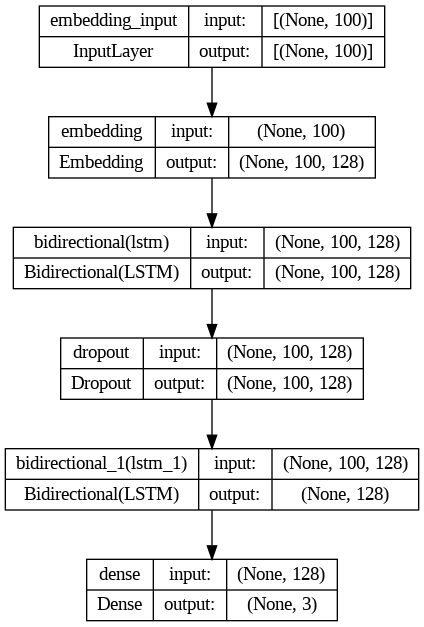

In [ ]:
# Menampilkan arsitektur model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## Evaluasi

419/419 [==============================] - 4s 7ms/step
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      4462
           1       0.78      0.89      0.83      4461
           2       0.90      0.86      0.88      4461

    accuracy                           0.85     13384
   macro avg       0.85      0.85      0.85     13384
weighted avg       0.85      0.85      0.85     13384



<Axes: >

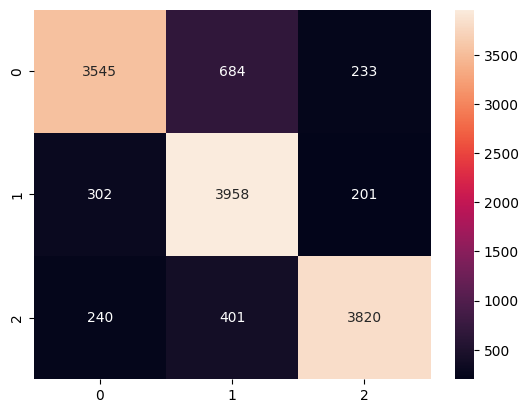

In [ ]:
# Evaluation
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred_classes))
conf_matrix = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d')

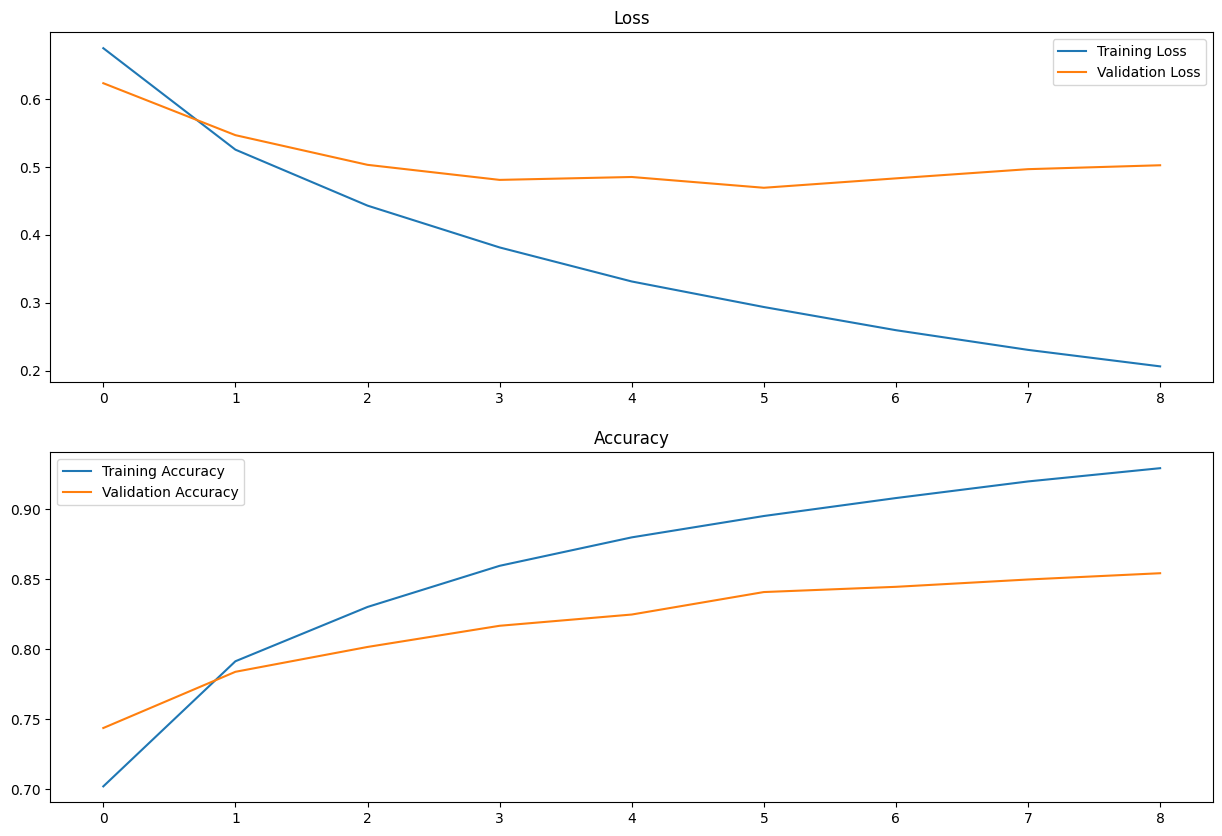

In [ ]:
# Plotting training history
fig, axs = plt.subplots(2, 1, figsize=(15, 10))
axs[0].plot(history.history['loss'], label='Training Loss')
axs[0].plot(history.history['val_loss'], label='Validation Loss')
axs[0].set_title('Loss')
axs[0].legend()

axs[1].plot(history.history['accuracy'], label='Training Accuracy')
axs[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[1].set_title('Accuracy')
axs[1].legend()

plt.show()


#Deployment Model

In [ ]:
!pip install -U -q ibm-watson-machine-learning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.5/139.5 kB 20.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 9.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.


In [ ]:
api_key='5fioEc-zz8-MG606_BMmUz3jAfJWBVyE2gl9DxSeNs01'
location = 'us-south'

wml_credentials = {
    "apikey": api_key,
    "url": 'https://' + location + '.ml.cloud.ibm.com'
}

In [ ]:
from ibm_watson_machine_learning import APIClient

client = APIClient(wml_credentials)

client.spaces.list(limit=5)

------------------------------------  --------------------  ------------------------
ID                                    NAME                  CREATED
9003e569-ff21-43b0-8672-2a60999cd8d5  nlp_capstone          2024-06-15T13:09:16.395Z
2ccda619-bae9-4d6d-8590-33ac1d40cb24  project_capstone_nlp  2024-06-15T06:44:07.296Z
4ad5d936-55a0-4a36-8fa3-c842e27c5ef2  capstone_project_nlp  2024-06-13T17:17:05.218Z
------------------------------------  --------------------  ------------------------


,ID,NAME,CREATED
0,9003e569-ff21-43b0-8672-2a60999cd8d5,nlp_capstone,2024-06-15T13:09:16.395Z
1,2ccda619-bae9-4d6d-8590-33ac1d40cb24,project_capstone_nlp,2024-06-15T06:44:07.296Z
2,4ad5d936-55a0-4a36-8fa3-c842e27c5ef2,capstone_project_nlp,2024-06-13T17:17:05.218Z


In [ ]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    return (
        next(item for item in space["resources"] if item["entity"]["name"] == space_name)["metadata"]["id"]
    )

space_uid = guid_from_space_name(client, "nlp_capstone")
print("Space UID - " + space_uid)

Space UID - 9003e569-ff21-43b0-8672-2a60999cd8d5


In [ ]:
space_id = space_uid #id dari space yg telah dibaut

client.set.default_space(space_id)

'SUCCESS'

In [ ]:
# Publish model in Watson Machine Learning repository on Cloud
sofware_spec_uid = client.software_specifications.get_id_by_name("runtime-23.1-py3.10")
print(sofware_spec_uid)

336b29df-e0e1-5e7d-b6a5-f6ab722625b2


In [ ]:
#compres model yang sudah kesimpan
!tar -zcvf twitchscore.h5.tgz twitchscore.h5

twitchscore.h5


In [ ]:
#Define model name, autor name and email.
metadata = {
    client.repository.ModelMetaNames.NAME: "NLP Model",
    client.repository.ModelMetaNames.TYPE: "tensorflow_2.12",  # Tipe model TensorFlow yang digunakan
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: sofware_spec_uid
}

# Simpan model ke Watson Machine Learning
published_model = client.repository.store_model(
    model='twitchscore.h5.tgz', #gunakan loaded_model untuk published_model
    meta_props=metadata,
    training_data=X_train, #gunakan train_dataset dari tf.data.Dataset
    training_target=y_train
)

In [ ]:
published_model_id = client.repository.get_model_id(published_model)
published_model_id

'54eb06e4-7f0c-4ce6-ae59-ad041221cfdd'

In [ ]:
metadata = {
    client.deployments.ConfigurationMetaNames.NAME: "Deploy NLP model",
    client.deployments.ConfigurationMetaNames.ONLINE: {}
}

created_deployment = client.deployments.create(published_model_id,
                                               meta_props=metadata)



#######################################################################################

Synchronous deployment creation for uid: '54eb06e4-7f0c-4ce6-ae59-ad041221cfdd' started

#######################################################################################


initializing
Note: online_url and serving_urls are deprecated and will be removed in a future release. Use inference instead.
...
ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='71314e8b-d3df-4c1f-a483-dc64ec1d94ac'
------------------------------------------------------------------------------------------------




In [ ]:
deployment_id = client.deployments.get_id(created_deployment)
deployment_id

'71314e8b-d3df-4c1f-a483-dc64ec1d94ac'

##Testing

In [ ]:
new_testing = "Bad live streaming app ever."
print(preprocess_text(new_testing))

['bad', 'live', 'streaming', 'app', 'ever']


In [ ]:
text_prepoc = preprocess_text(new_testing)

In [ ]:
X_testing = tokenizer.texts_to_sequences(text_prepoc)
X1_testing = pad_sequences(X_testing, maxlen=100)

In [ ]:
test_data = np.array(X)

In [ ]:
scoring_payload = {"input_data": [{"values": X1_testing}]}
deployment_id= '71314e8b-d3df-4c1f-a483-dc64ec1d94ac'

predictions = client.deployments.score(deployment_id, scoring_payload)

In [ ]:
scoring_response_json = predictions
print(scoring_response_json)

# Extracting and printing the prediction results
prediction = scoring_response_json['predictions'][0]
predicted_probabilities = prediction['values'][0][0]
predicted_class = prediction['values'][0][1]

print(f"Predicted class: {predicted_class}")
print(f"Predicted probabilities: {predicted_probabilities}")

{'predictions': [{'id': 'dense', 'fields': ['prediction', 'prediction_classes', 'probability'], 'values': [[[0.7772701978683472, 0.17230814695358276, 0.050421617925167084], 0, [0.7772701978683472, 0.17230814695358276, 0.050421617925167084]], [[0.08525051921606064, 0.12522073090076447, 0.7895287275314331], 2, [0.08525051921606064, 0.12522073090076447, 0.7895287275314331]], [[0.17355038225650787, 0.08825242519378662, 0.7381972074508667], 2, [0.17355038225650787, 0.08825242519378662, 0.7381972074508667]], [[0.1503017097711563, 0.12034518271684647, 0.7293530702590942], 2, [0.1503017097711563, 0.12034518271684647, 0.7293530702590942]], [[0.05790398642420769, 0.014634634368121624, 0.9274613857269287], 2, [0.05790398642420769, 0.014634634368121624, 0.9274613857269287]]]}]}
Predicted class: 0
Predicted probabilities: [0.7772701978683472, 0.17230814695358276, 0.050421617925167084]


# Kesimpulan


Akurasi model mencapai 85%, yang menunjukkan bahwa model secara umum dapat memprediksi dengan akurat sentimen dari teks yang diberikan.
F1-score yang baik untuk setiap kelas menunjukkan bahwa model memiliki keseimbangan yang baik antara precision dan recall untuk setiap kelas sentimen.
Namun, perlu diperhatikan bahwa kelas negative (0) memiliki nilai recall yang sedikit lebih rendah dibandingkan dengan kelas lainnya, menunjukkan bahwa model cenderung memiliki kesulitan dalam mengidentifikasi sentimen negatif secara konsisten.



Berdasarkan respons prediksi, model memprediksi kelas sentimen dari teks yang diberikan dengan probabilitas tertentu untuk masing-masing kelas. Contohnya, untuk teks "Bad live streaming app ever.", model memprediksi kelas 0 (negative) dengan probabilitas sekitar 0.77 atau 77%, kelas 1 (neutral) dengan probabilitas sekitar 0.17, dan kelas 2 (positive) dengan probabilitas sekitar 0.05.

